## Assigning plate ids to features

To reconstruct any feature geometries, each feature must have a plate id assigned. If they don't already, then the pygplates function 'PlatePartitioner' performs this function (analogous to the 'assign plate ids' menu option in GPlates GUI) 

In the first example, we partition magnetic anomaly picks from the Global Seafloor Fabric and Magnetic Lineation Database (or GSFML): http://www.soest.hawaii.edu/PT/GSFML/

Magnetic picks from this database can be downloaded in GPlates-friendly data formats - however, none of the points are associated with any particular plate tectonic reconstruction or plate id system. Hence, to be able to reconstruct these points, we need to assign the plate id to each point ourselves. This involves using the 'Static Polygons' - for an overview, look at the 'Creating Features' tutorial for GPlates: https://sites.google.com/site/gplatestutorials/



In [6]:
import pygplates

# The magnetic picks are the 'features to partition'
# Since they are already in OGR GMT format, gplates can read them directly 
mag_picks = pygplates.FeatureCollection('Data/GSFML.Gaina++_2009_JGeolSoc.picks.gmt')

# static polygons are the 'partitioning features'
static_polygons = pygplates.FeatureCollection('Data/Seton_etal_ESR2012_StaticPolygons_2012.1.gpmlz')

# The partition_into_plates function requires a rotation model, since sometimes this would be
# necessary even at present day (for example to resolve topological polygons)
rotation_model=pygplates.RotationModel('Data/Seton_etal_ESR2012_2012.1.rot')

# partition features
partitioned_mag_picks = pygplates.partition_into_plates(static_polygons,
                                                       rotation_model,
                                                       mag_picks)

# Write the partitioned data set to a file
output_feature_collection = pygplates.FeatureCollection(partitioned_mag_picks)
output_feature_collection.write('tmp/GSFML.Gaina++_2009_JGeolSoc.picks.partitioned.gmt')


As a second example, we take a dataset that currently could not be loaded directly into gplates (since it is not in a gplates-readable format).

The points are paleoenvironmental indicators from a map compilation by Boucot et al (2013), downloaded in from Christopher Scotese's rsearchgate page in csv format (all data are lat,long points with a series of other attributes).

There are a number of ways to deal with this data in python, here we use a pandas dataframe

In [7]:
import pandas as pd

df = pd.read_csv('Data/Boucot_etal_Map24_Paleocene_v4.csv',sep=',')

df


,LithologyCode,LithNumber,OldIDNumber,Unnamed: 3,LAT,NS,LONG,EW,Continent,Country,Unnamed: 10,GeogComments,LMU,Period,Stage,AgeComments,Lithology,Formation,LithComments,PrimaryReference,
0,E,1,E5466,NaN,29.00,N,17.00,E,Africa,Libya,NaN,NaN,Lower,Paleogene,NaN,NaN,Evaporites,Hofra(?),NaN,Claypool et al.(1980),...
1,E,2,E5467,NaN,28.00,N,22.00,E,Africa,Libya,NaN,Sirte Basin,Lower,Paleogene,NaN,NaN,Evaporites,NaN,NaN,"Gillespie,Sanford(1967)",...
2,E,3,E5468,NaN,28.00,N,17.00,E,Africa,Libya,NaN,Sirte Basin,Lower,Paleogene,NaN,Montian,Evaporites,NaN,NaN,Abushagur(1992),...
3,E,4,E5469,NaN,28.00,N,18.00,E,Africa,Libya,NaN,NaN,Lower,Paleogene,NaN,Montian,Evaporites,Beda Dolomite,NaN,"Garea,Braithwaite(1996)",...
4,E,5,E5469.1,NaN,31.00,N,21.00,E,Africa,Libya,NaN,Al Jabar al Akhdar,Lower,Paleogene,NaN,Late Paleocene,Evaporites,NaN,in well DI-41,Abdul-Samad(2000),...
5,E,6,E5470,NaN,32.00,N,-7.00,W,Africa,Morocco,NaN,NaN,Lower,Paleogene,NaN,Paleocene,Evaporites,NaN,NaN,Salvan(1972),...
6,E,7,E5471,NaN,13.00,N,6.00,E,Africa,Nigeria,NaN,northwestern Nigeria,Lower,Paleogene,NaN,NaN,Gypsum,Thanetian Dange,NaN,Petters(1979),...
7,E,8,E5471.1,NaN,15.00,N,5.50,E,Africa,Nigeria,NaN,Sokoto Basin,Lower,Paleogene,NaN,Paleocene,Evaporites,Unit B of Paleocene age,NaN,Alam(1986),...
8,E,9,E5472,NaN,5.00,N,47.00,E,Africa,Somalia,NaN,coastal Somalia,Lower,Paleogene,NaN,Paleocene,Evaporites,NaN,NaN,Barnes(1976),...
9,E,10,E5472.1,NaN,-33.00,S,28.00,E,Africa,South Africa,NaN,Fort Gray,Lower,Paleogene,NaN,Paleocene,Evaporites,Knysna,NaN,Dingle et al.(1983),...


There are a few ways to assign plateids, but the simplest ways generally involve putting the points into a feature collection and using the same partitioning function we used above on the.


In [18]:
# put the points into a feature collection, using Lat,Long coordinates from dataframe
point_features = []
for index,row in df.iterrows():
    point = pygplates.PointOnSphere(float(row.LAT),float(row.LONG))
    point_feature = pygplates.Feature()
    point_feature.set_geometry(point)
    point_features.append(point_feature)
    
# The partition points function can then be used as before
partitioned_point_features = pygplates.partition_into_plates(static_polygons,
                                                       rotation_model,
                                                       point_features) 

# Reconstruct the points to 60 Ma (in the Paleocene)
#reconstructed_point_features = []
pygplates.reconstruct(partitioned_point_features,
                      rotation_model,
                      'tmp/reconstructed_points.shp',
                     60.0)  

coastlines_filename = 'Data/Seton_etal_ESR2012_Coastlines_2012.1_Polygon.gpmlz'
pygplates.reconstruct(coastlines_filename,
                      rotation_model,
                      'tmp/reconstructed_coastlines.shp',
                     60.0) 



Now we can plot the reconstructed points to see their distribution in the Paleocene

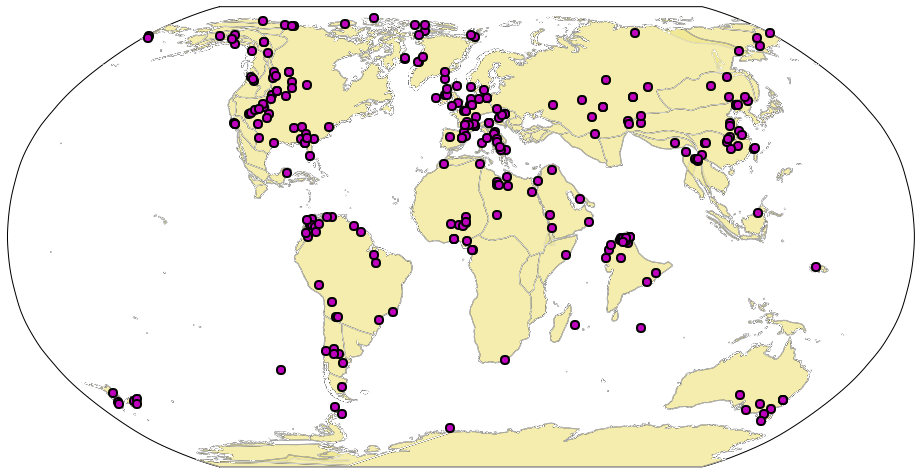

In [37]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.patches import Polygon

%matplotlib inline

fig = plt.figure(figsize=(14,10))
ax_map = fig.add_axes([0,0,0.9,1.0])
m = Basemap(projection='robin', lon_0=0, resolution='c', ax=ax_map)

shp_info = m.readshapefile('tmp/reconstructed_coastlines','shp',drawbounds=True,color='w')
    
for nshape,seg in enumerate(m.shp):
    poly = Polygon(seg,facecolor='khaki',edgecolor='k',alpha=0.7)
    ax_map.add_patch(poly)
    
m.readshapefile('tmp/reconstructed_points', 'reconstructed_points')
 
for p in m.reconstructed_points:
    m.plot(p[0], p[1], marker='o', color='m', markersize=8, markeredgewidth=2)
    
plt.show()
